# Credit Risk Modeling: Predicting Loan Default

# Phase 1: Data exploration & Visualisation




    

# Table of contents

1. Introduction


    1.1 Dataset Source 
    
    1.2 Dataset Details
    
    1.3 Dataset Features
    
    1.4 Target Feature
    
    
2. Goals and Objectives


3. Data Cleaning & Preprocessing 


    3.1 Data Cleaning Steps

4. Data Exploration & Visualisation

5. Summary & Conclusions

6. References 
    

# Introduction


    

# Dataset Source
The Credit Risk Dataset used in study was sourced from Kaggle (Credit Risk Dataset, 2020). This dataset contains columns simulating credit bureau data.


# Dataset Details
The dataset, named "credit_risk_dataset.csv," is used for assessing credit risk. It contains comprehensive data about individuals applying for loans. The features included span personal and financial information crucial for determining the risk associated with lending to each individual. This analysis aims to predict the likelihood of loan default, which is a critical task for financial institutions to manage and mitigate potential risks effectively.
This dataset has a total of 12 features and 32581 observations.

In [1]:
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('credit_risk_dataset.csv')

# Display the number of observations and features
print("Number of observations (rows):", data.shape[0])
print("Number of features (columns):", data.shape[1])

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Display 10 random observations from the dataset
print("10 random observations from the dataset:")
display(data.sample(10))


Number of observations (rows): 32581
Number of features (columns): 12
10 random observations from the dataset:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29201,36,14400,OWN,7.0,DEBTCONSOLIDATION,A,7000,5.42,1,0.49,N,16
14729,22,41000,RENT,3.0,DEBTCONSOLIDATION,C,15000,12.73,1,0.37,N,3
4601,25,115000,RENT,3.0,MEDICAL,B,10000,10.37,0,0.09,N,2
3813,22,38400,OWN,6.0,PERSONAL,C,10000,14.72,0,0.26,N,3
29762,45,37500,MORTGAGE,1.0,DEBTCONSOLIDATION,B,5000,11.49,0,0.13,N,16
7117,22,51600,MORTGAGE,2.0,VENTURE,C,7000,12.98,0,0.14,Y,2
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
25075,31,74000,MORTGAGE,13.0,VENTURE,C,1500,12.68,1,0.02,N,10
1486,22,44664,RENT,5.0,MEDICAL,C,1200,12.68,0,0.03,Y,3
29971,50,36000,RENT,0.0,VENTURE,B,5000,10.37,0,0.14,N,16


# Dataset Features
The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.


In [2]:
from tabulate import tabulate

# Define the headers and rows for the table
headers = ['Name of the Feature', 'Data Type', 'Units', 'Brief Description']
features_info = [
    ['person_age', 'Numeric', 'Years', 'Age of the person'],
    ['person_income', 'Numeric', 'USD', 'Annual income of the person'],
    ['person_home_ownership', 'Nominal Categorical', 'NA', 'Home ownership status (e.g., rent, own)'],
    ['person_emp_length', 'Numeric', 'Years', 'Length of employment in years'],
    ['loan_intent', 'Nominal Categorical', 'NA', 'Intent of the loan (e.g., personal, education)'],
    ['loan_grade', 'Ordinal Categorical', 'NA', 'Grade of the loan assigned by the lender'],
    ['loan_amnt', 'Numeric', 'USD', 'Loan amount borrowed'],
    ['loan_int_rate', 'Numeric', 'Percentage', 'Interest rate of the loan'],
    ['loan_status', 'Binary', 'NA', 'Loan status (0 for non-default, 1 for default)'],
    ['loan_percent_income', 'Numeric', 'Ratio', 'Loan amount as a percentage of annual income'],
    ['cb_person_default_on_file', 'Binary', 'NA', 'Historical default status (Y/N)'],
    ['cb_person_cred_hist_length', 'Numeric', 'Years', 'Length of the person’s credit history']
]

# Use the tabulate library to format this information into a table
print(tabulate(features_info, headers=headers, tablefmt='grid'))


+----------------------------+---------------------+------------+------------------------------------------------+
| Name of the Feature        | Data Type           | Units      | Brief Description                              |
+============================+=====================+============+================================================+
| person_age                 | Numeric             | Years      | Age of the person                              |
+----------------------------+---------------------+------------+------------------------------------------------+
| person_income              | Numeric             | USD        | Annual income of the person                    |
+----------------------------+---------------------+------------+------------------------------------------------+
| person_home_ownership      | Nominal Categorical | NA         | Home ownership status (e.g., rent, own)        |
+----------------------------+---------------------+------------+---------------

# Target Feature
In the Credit Risk Modeling project, the primary target feature is **loan_status**, a binary attribute where **0** signifies a non-default status and **1** indicates a default. This feature is crucial as it determines whether a loan is being repaid on time or has fallen into default. Predicting loan status is vital for assessing credit risk, enabling financial institutions to mitigate potential risks associated with loan issuance. Accurate predictions can enhance decision-making processes, reduce financial losses, and improve overall management of credit risk. The effectiveness of the predictive model in accurately forecasting this outcome will directly influence its practical utility in the banking sector.


# Goals and Objectives
The primary goal of the Credit Risk Modeling project is to develop a sophisticated predictive model capable of accurately determining the likelihood of loan defaults. This goal is pivotal for aiding financial institutions in enhancing their risk management strategies, which in turn optimizes their decision-making processes regarding loan approvals.

A major objective of the project is to enhance the accuracy of predictions regarding loan status (default or non-default). This involves using machine learning algorithms to analyze patterns and correlations within the dataset to identify key factors that influence the likelihood of default. Such insights will refine risk assessment methodologies, enabling lenders to manage risks more effectively and tailor their strategies to individual borrower profiles.

Furthermore, the project aims to provide financial analysts with a robust analytical tool that facilitates a more efficient and precise evaluation of credit risks. This tool will support better-informed lending decisions, potentially reducing the incidence of loan defaults. Through comprehensive data exploration and model development, the project also seeks to generate deeper insights into borrower behaviors and characteristics that correlate with higher default risks.

Additionally, the versatility of the model is a critical objective. The intent is to develop a model that can be easily adapted to different datasets or changing conditions with minimal reconfiguration, making it a valuable asset across various contexts within the financial sector.

A secondary objective, which is the focus of this Phase 1 report, involves conducting exploratory data analysis to gain preliminary insights into the dataset. This includes employing basic descriptive statistics and data visualization techniques to uncover patterns and relationships within the data. Prior to this analysis, some initial data cleaning and preprocessing steps will be undertaken to ensure the data is in an optimal format for exploration. These steps are crucial as they set the foundation for accurate and effective analysis in the subsequent phases of the project.

By meeting these objectives, the project will not only improve the predictive capabilities of financial institutions but also contribute valuable knowledge to the field of credit risk analysis. This will foster a more systematic and balanced approach to credit lending, supporting a healthier financial landscape by aligning opportunities with appropriate risk levels.


# Data Cleaning and Preprocessing


# Data Cleaning Steps
- Finding and removing the missing values
- Checking for outliers
- Identifying potential anomalies
- Random sampling of the dataset for 5000 rows

In [3]:
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().mean() * 100

# Display the percentage of missing values
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [4]:
# Display original number of rows
print("Original number of rows:", data.shape[0])

# Remove rows where 'person_emp_length' or 'loan_int_rate' is missing
data_cleaned = data.dropna(subset=['person_emp_length', 'loan_int_rate'])

# Display new number of rows
print("Number of rows after removing missing values:", data_cleaned.shape[0])

Original number of rows: 32581
Number of rows after removing missing values: 28638


This method will effectively clean the dataset by removing rows with missing values in key columns, ensuring that the data used for further analysis is complete. However, we have to consider the impact of reducing the dataset size on analysis and model training, but a significant number of rows are not removed so it's impact won't we noticed.


In [5]:
# Calculate maximum and minimum age in the dataset
max_age = data_cleaned['person_age'].max()
min_age = data_cleaned['person_age'].min()

# Print the results
print("Maximum age in the dataset:", max_age)
print("Minimum age in the dataset:", min_age)

Maximum age in the dataset: 144
Minimum age in the dataset: 20


In [6]:
# Print the original number of rows
print("Original number of rows:", data_cleaned.shape[0])

# Define a logical maximum age, for example, 100 years
logical_max_age = 100

# Remove entries where 'person_age' exceeds the logical maximum age
data_cleaned = data_cleaned[data_cleaned['person_age'] <= logical_max_age]

# Print the new number of rows to see how many entries were removed
print("Number of rows after removing outliers in age:", data_cleaned.shape[0])

#removing the outliers from the person income attribute
data_cleaned = data_cleaned[data_cleaned['person_income'] <= 1e6]

#removing the outliers from the person employment years
data_cleaned = data_cleaned[data_cleaned['person_emp_length'] < 45]


Original number of rows: 28638
Number of rows after removing outliers in age: 28634


This method ensures that the dataset remains free of extreme outliers in age, which could skew the analysis or the performance of our predictive models.

In [7]:
# Identify categorical columns, assuming these are known categories
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']

# Print unique values for each categorical column
for col in categorical_columns:
    unique_values = data_cleaned[col].unique()
    display(f"Unique values in '{col}': {unique_values}")


"Unique values in 'person_home_ownership': ['OWN' 'MORTGAGE' 'RENT' 'OTHER']"

"Unique values in 'loan_intent': ['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'\n 'DEBTCONSOLIDATION']"

"Unique values in 'loan_grade': ['B' 'C' 'A' 'D' 'E' 'F' 'G']"

"Unique values in 'loan_status': [0 1]"

"Unique values in 'cb_person_default_on_file': ['N' 'Y']"

This approach helps to quickly examine the variety within the categorical data, ensuring that all categories are appropriate and consistent, and identifying any potential anomalies or unexpected categories.

In [8]:
# Perform random sampling to get exactly 5000 rows
sampled_data = data_cleaned.sample(n=5000, random_state=42)  # Use a random state for reproducibility

# Display 5 random rows from the sampled data
print("5 random observations from the sampled data:")
display(sampled_data.sample(10))

5 random observations from the sampled data:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
3944,24,47088,RENT,8.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.08,N,4
9633,26,63000,MORTGAGE,10.0,HOMEIMPROVEMENT,B,10000,9.25,0,0.16,N,3
18087,31,180000,MORTGAGE,5.0,VENTURE,C,9000,14.27,0,0.05,Y,6
17635,25,34000,RENT,0.0,EDUCATION,C,10000,13.79,1,0.29,Y,2
22697,33,51000,MORTGAGE,2.0,EDUCATION,A,1200,9.63,1,0.02,N,7
24572,28,68900,MORTGAGE,1.0,PERSONAL,E,18000,17.39,1,0.26,N,7
1186,26,42000,RENT,0.0,HOMEIMPROVEMENT,D,16750,17.58,1,0.40,N,3
7752,23,35000,RENT,5.0,DEBTCONSOLIDATION,A,7000,6.03,0,0.20,N,2
10132,25,24000,RENT,9.0,PERSONAL,B,9600,11.71,1,0.40,N,4
1513,22,69600,RENT,6.0,DEBTCONSOLIDATION,C,1350,12.68,0,0.02,N,3


This process not only efficiently reduces the dataset size to a manageable number but also allows for a quick verification of the data's integrity and randomness after sampling, ensuring that the analysis can proceed on a representative subset of the original data.

# Data Exploration and Visualisation
Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.



Value counts of loan status: 0    3881
1    1119
Name: loan_status, dtype: int64


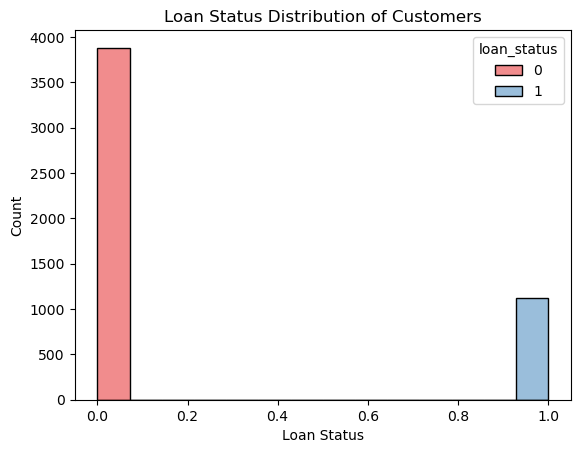

In [9]:
print("Value counts of loan status:", sampled_data['loan_status'].value_counts())

# Plotting the histogram for the 'loan_status' column
sns.histplot(data=sampled_data, x="loan_status", hue="loan_status", palette="Set1")
plt.title('Loan Status Distribution of Customers')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

As could be predicted, there are numerous instances in our data where clients do not have a default on file. Merely 17% of the information explains why their files have defaulted. During the model training process, let's address this imbalance in class.



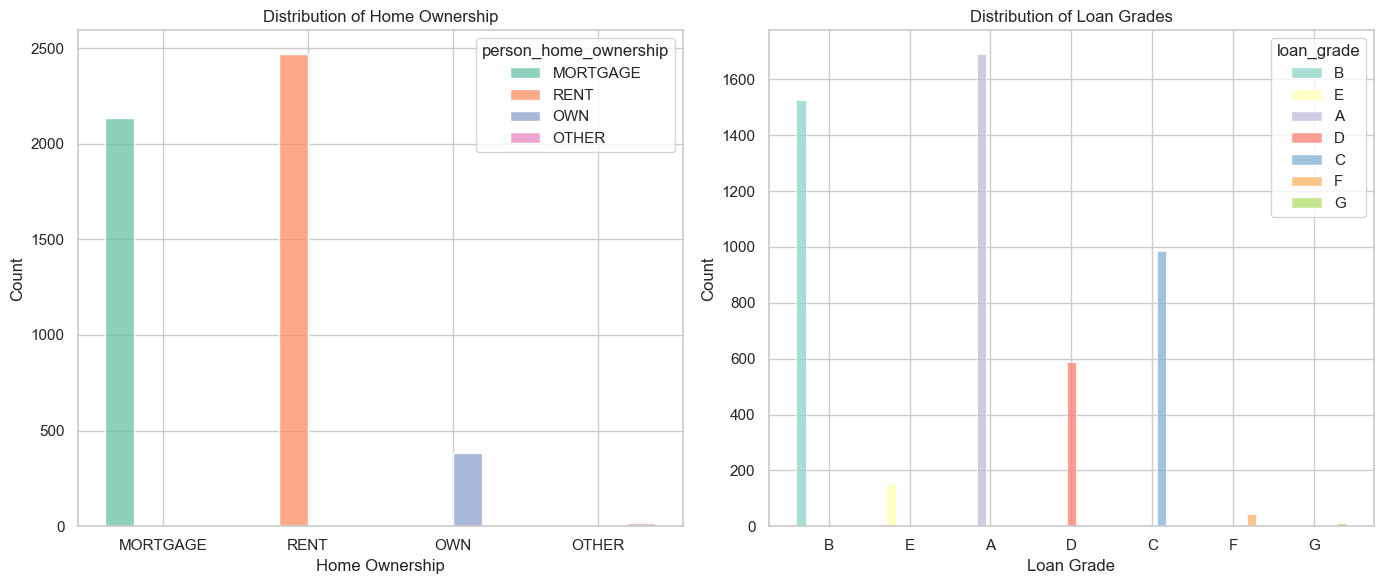

In [10]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with a specific size to accommodate two subplots
plt.figure(figsize=(14, 6))

# Plot histogram for 'person_home_ownership'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(data=sampled_data, x="person_home_ownership", hue="person_home_ownership", palette="Set2", multiple="dodge", shrink=0.8)
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

# Plot histogram for 'loan_grade'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(data=sampled_data, x="loan_grade", hue="loan_grade", palette="Set3", multiple="dodge", shrink=0.8)
plt.title('Distribution of Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

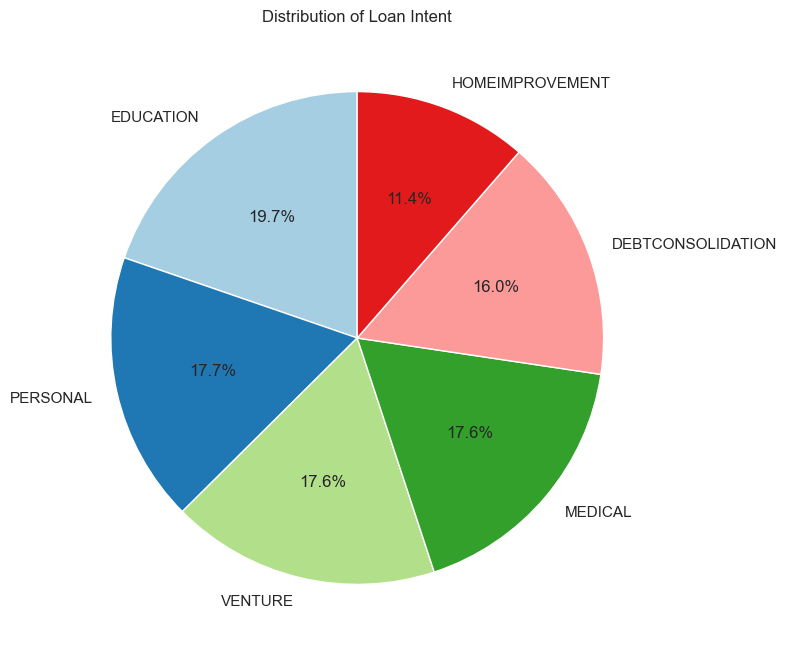

In [11]:
# Calculate the counts of each unique value in the 'loan_intent' column
loan_intent_counts = sampled_data['loan_intent'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(loan_intent_counts, labels=loan_intent_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(loan_intent_counts))))
plt.title('Distribution of Loan Intent')
plt.show()

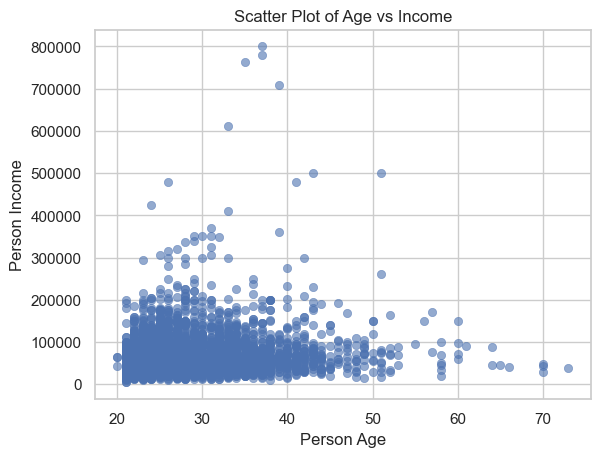

In [12]:
# Create the scatter plot

sns.scatterplot(x='person_age', y='person_income', data=sampled_data, alpha=0.6, edgecolor=None)

# Set the title and labels of the plot
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Person Age')
plt.ylabel('Person Income')

# Show the plot
plt.show()

The scatterplot indicates that there are no discernible patterns that would account for the correlation between person income and age.

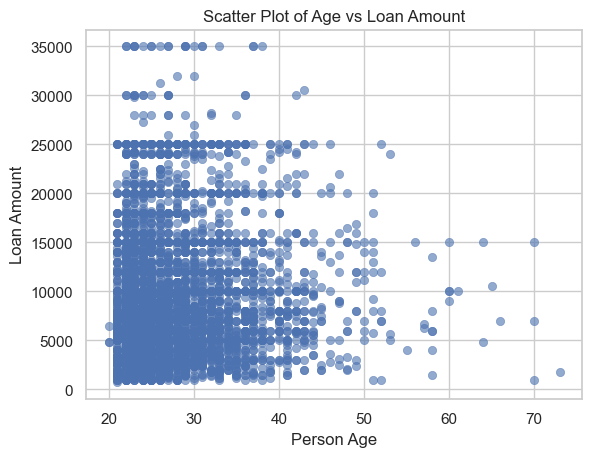

In [13]:
# Create the scatter plot
sns.scatterplot(x='person_age', y='loan_amnt', data=sampled_data, alpha=0.6, edgecolor=None)

# Set the title and labels of the plot
plt.title('Scatter Plot of Age vs Loan Amount')
plt.xlabel('Person Age')
plt.ylabel('Loan Amount')

# Show the plot
plt.show()

The scatterplot indicates that there are no discernible patterns that would account for the correlation between person loan amount and age.

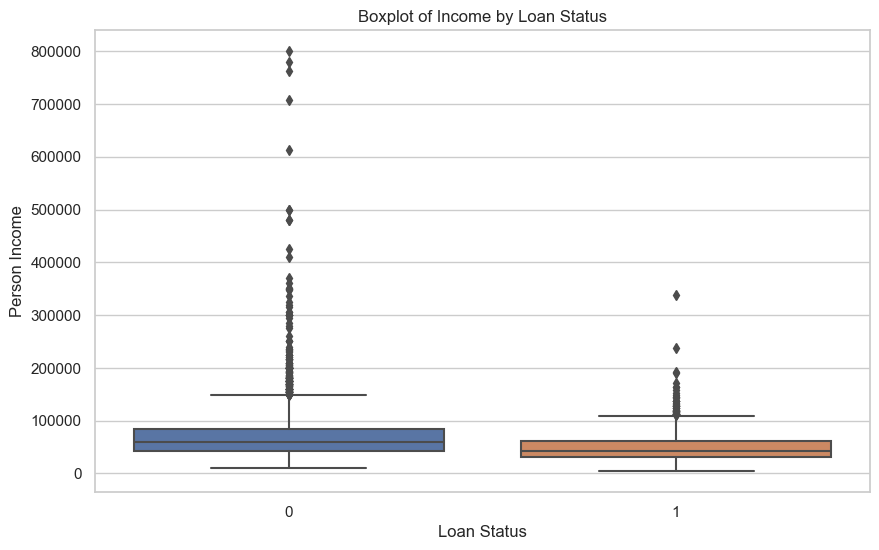

In [14]:
# Create a boxplot of person_income by loan_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_income', data=sampled_data)
plt.title('Boxplot of Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Person Income')
plt.show()


The boxplot indicates that there are no discernible patterns that would account for the correlation between person income and loan status. We will create more plots to find a strongly correlated attribute.

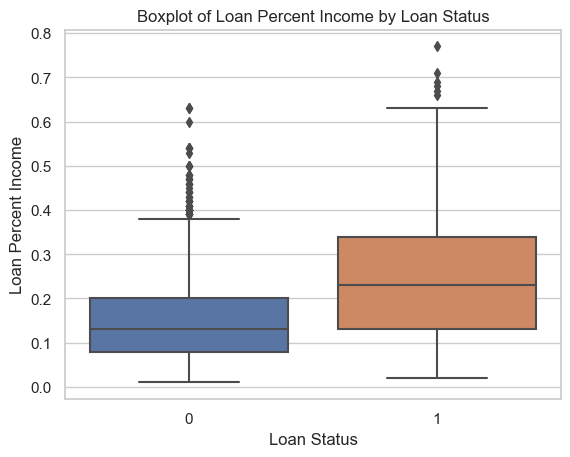

In [15]:
# Create the point plot
sns.boxplot(x='loan_status', y='loan_percent_income', data=sampled_data)

# Set the title and labels of the plot
plt.title('Boxplot of Loan Percent Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent Income')

# Show the plot
plt.show()

The boxplot indicated that there is a significant pattern between the loan percent income and loan status.

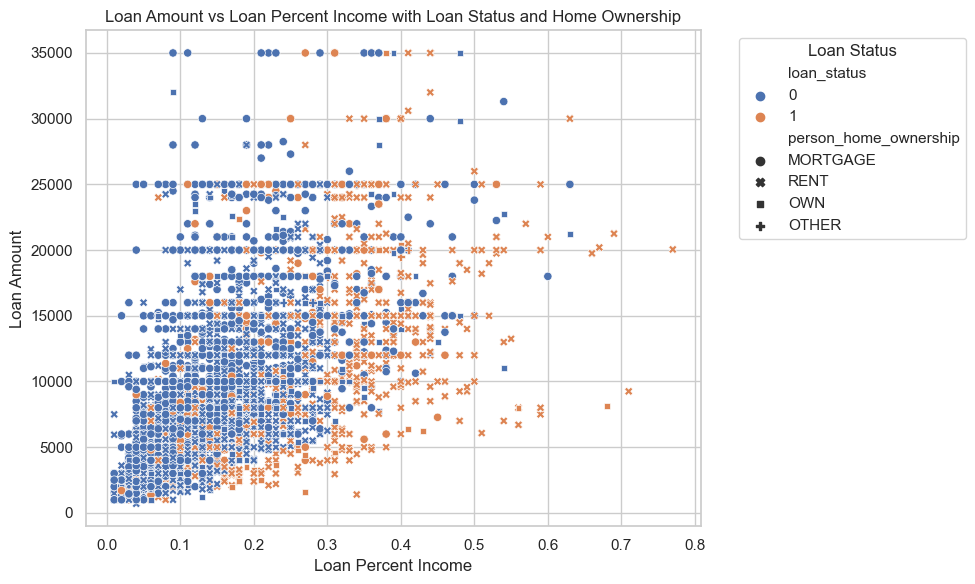

In [16]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_percent_income', y='loan_amnt', hue='loan_status', style='person_home_ownership', data=sampled_data)

# Set the title and labels of the plot
plt.title('Loan Amount vs Loan Percent Income with Loan Status and Home Ownership')
plt.xlabel('Loan Percent Income')
plt.ylabel('Loan Amount')

# Show the plot
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Adjust the plot to ensure the legend is not cut off
plt.show()

This plot shows us the pattern in how loan amounts as a percent of income correlate with defaulting. The loan status is scattered more in the area of high loan percent income. Loan status is mostly 0 in the areas of low loan percent income.

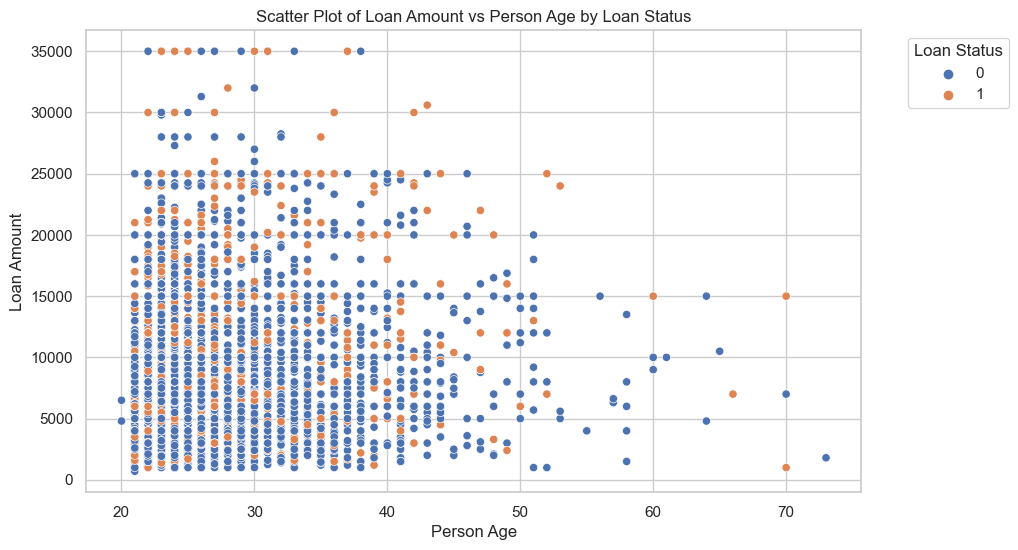

In [17]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_age', y='loan_amnt', hue='loan_status', data=sampled_data)

# Set the title and labels of the plot
plt.title('Scatter Plot of Loan Amount vs Person Age by Loan Status')
plt.xlabel('Person Age')
plt.ylabel('Loan Amount')

# Place a legend on the plot
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

The scatterplot indicates that there are no discernible patterns that would account for the correlation between person loan amount and age. Even after using an extra variable loan status, now significant pattern can be seen in plot.

# Summary & Conclusions

In the first phase of our Credit Risk Modeling project, we achieved substantial progress in data preparation and preliminary analysis, which are crucial for understanding the dynamics that might influence loan defaults. Here's a detailed summary of the insights gained and their alignment with our project goals:

**Data Preprocessing and Exploration:** We effectively cleaned and preprocessed the data by addressing missing values and removing outliers, such as entries with person incomes over $1,000,000 and employment lengths exceeding 45 years. This refinement ensures our dataset accurately reflects typical financial situations, setting a reliable foundation for further analysis.

**Class Imbalance:** Our exploratory data analysis revealed a significant class imbalance within the `loan_status` variable, with only 17% of entries representing defaults. This imbalance is critical as it suggests our model could become biased toward predicting non-defaults if not properly addressed.

**Analytical Insights from Visualizations:** Despite extensive exploratory data analysis, scatter plots comparing income and age against loan amount disclosed no evident patterns, indicating that these factors alone do not directly determine the loan amount. Similarly, multi-variable analysis involving home ownership did not reveal significant insights into the loan status.

However, our exploration yielded valuable findings from the boxplot analysis of loan percent income versus loan status. It highlighted a noticeable trend where higher loan percentages of income are correlated with increased default rates. This pattern suggests that the financial burden relative to income is a potential predictor of default, emphasizing the need for deeper analysis in this area.

**Conclusions and Forward Look:** The absence of strong correlations in several areas suggests that loan defaulting likely results from complex interactions between various features rather than straightforward financial metrics. The insight regarding loan percent income and default likelihood is particularly promising, as it provides a clear direction for feature engineering and further analytical depth in the next phase.

**Next Steps:** Moving forward, the second phase will involve applying various machine learning models to our dataset. We aim to evaluate different algorithms, addressing the class imbalance and optimizing for predictive accuracy. The insights gleaned from the first phase, especially concerning the proportion of income dedicated to loans, will be pivotal in this endeavor.

Overall, the first phase has established a solid groundwork for developing a robust model aimed at enhancing credit risk assessment. The subsequent phase will focus on extensive model testing and validation to refine our predictions and determine the most effective model for predicting loan defaults.

# References

- Credit Risk Dataset. (2020). Www.kaggle.com.
    https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data